<a href="https://colab.research.google.com/github/kalomausman/exercise_submissions/blob/main/Week_3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arewa Data Science Academy (Week 3 Assignment)

Deep Learning Cohort2.0

Name: Kaloma Usman Majikumna

Epoch [10/100], Loss: 0.5924, Test Loss: 0.5904
Epoch [20/100], Loss: 0.4370, Test Loss: 0.4380
Epoch [30/100], Loss: 0.3147, Test Loss: 0.3157
Epoch [40/100], Loss: 0.2654, Test Loss: 0.2600
Epoch [50/100], Loss: 0.2524, Test Loss: 0.2428
Epoch [60/100], Loss: 0.2484, Test Loss: 0.2362
Epoch [70/100], Loss: 0.2425, Test Loss: 0.2306
Epoch [80/100], Loss: 0.2368, Test Loss: 0.2261
Epoch [90/100], Loss: 0.2313, Test Loss: 0.2207
Epoch [100/100], Loss: 0.2263, Test Loss: 0.2152


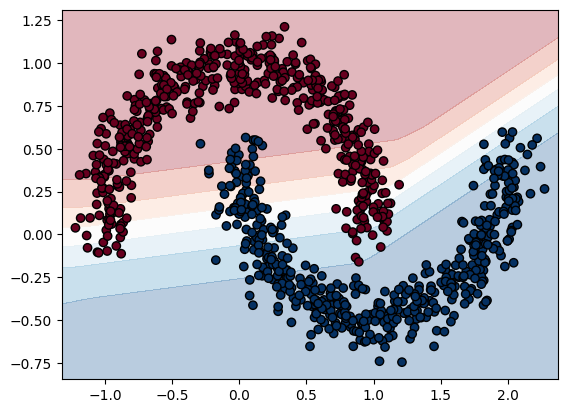

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 1. Create a binary classification dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 2. Define a neural network model
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

# Create model instance
model = BinaryClassificationModel()

# 3. Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            test_preds = model(X_test)
            test_loss = criterion(test_preds, y_test)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# 5. Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.show()

plot_decision_boundary(model, X, y)


Epoch [10/100], Loss: 1.0055, Test Loss: 1.0245
Epoch [20/100], Loss: 0.9064, Test Loss: 0.9185
Epoch [30/100], Loss: 0.8235, Test Loss: 0.8226
Epoch [40/100], Loss: 0.7453, Test Loss: 0.7414
Epoch [50/100], Loss: 0.6724, Test Loss: 0.6733
Epoch [60/100], Loss: 0.5954, Test Loss: 0.6053
Epoch [70/100], Loss: 0.5253, Test Loss: 0.5407
Epoch [80/100], Loss: 0.4610, Test Loss: 0.4881
Epoch [90/100], Loss: 0.4031, Test Loss: 0.4257
Epoch [100/100], Loss: 0.3438, Test Loss: 0.3489


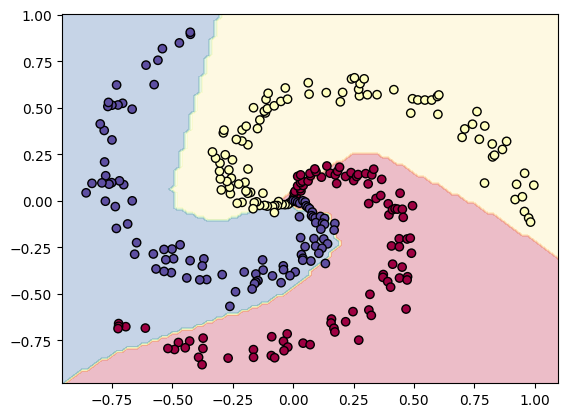

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 1. Create a multi-class classification dataset
N = 100  # Number of points per class
D = 2    # Dimensionality
K = 3    # Number of classes
X = np.zeros((N * K, D))  # Data matrix
y = np.zeros(N * K, dtype='uint8')  # Class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # Radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # Theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# 2. Define a neural network model
class MultiClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # 3 output classes
        )

    def forward(self, x):
        return self.layers(x)

# Create model instance
model = MultiClassModel()

# 3. Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            test_preds = model(X_test)
            test_loss = criterion(test_preds, y_test)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# 5. Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).argmax(dim=1).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.show()

plot_decision_boundary(model, X, y)


# **Step 1: Create and Prepare the Dataset**

In [20]:
import numpy as np
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Create the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: torch.Size([800, 2]), Training labels shape: torch.Size([800])
Test data shape: torch.Size([200, 2]), Test labels shape: torch.Size([200])


**Step 2: Build the Model**
Next, I’ll build a model by subclassing nn.Module that incorporates non-linear activation functions.

In [21]:
import torch.nn as nn

class MoonModel(nn.Module):
    def __init__(self):
        super(MoonModel, self).__init__()
        self.layer_1 = nn.Linear(2, 16)
        self.layer_2 = nn.Linear(16, 16)
        self.layer_3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = torch.sigmoid(self.layer_3(x))
        return x

model = MoonModel()
print(model)


MoonModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


**Step 3: Setup Loss Function and Optimizer**
I’ll use binary cross-entropy loss and the Adam optimizer.

In [22]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


**Step 4: Create Training and Testing Loop**
I’ll create a training and testing loop to fit the model to the data.

In [9]:
#!pip install torchmetrics #Installing the library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 843.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [23]:
#from torchmetrics import Accuracy

# Accuracy function
#accuracy_fn = Accuracy()

from torchmetrics.classification import BinaryAccuracy

# Accuracy function for binary classification
accuracy_fn = BinaryAccuracy()



# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_acc = accuracy_fn(y_pred.round(), y_train)

    # Testing loop
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test).squeeze()
        test_loss = loss_fn(y_test_pred, y_test)
        test_acc = accuracy_fn(y_test_pred.round(), y_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, "
              f"Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}")


Epoch 10/100, Train Loss: 0.6949, Train Acc: 0.5000, Test Loss: 0.6926, Test Acc: 0.5000
Epoch 20/100, Train Loss: 0.6808, Train Acc: 0.5000, Test Loss: 0.6797, Test Acc: 0.5000
Epoch 30/100, Train Loss: 0.6673, Train Acc: 0.5000, Test Loss: 0.6670, Test Acc: 0.5000
Epoch 40/100, Train Loss: 0.6507, Train Acc: 0.5800, Test Loss: 0.6513, Test Acc: 0.6100
Epoch 50/100, Train Loss: 0.6305, Train Acc: 0.7962, Test Loss: 0.6322, Test Acc: 0.7650
Epoch 60/100, Train Loss: 0.6059, Train Acc: 0.8388, Test Loss: 0.6087, Test Acc: 0.8000
Epoch 70/100, Train Loss: 0.5766, Train Acc: 0.8375, Test Loss: 0.5808, Test Acc: 0.8200
Epoch 80/100, Train Loss: 0.5430, Train Acc: 0.8313, Test Loss: 0.5489, Test Acc: 0.8150
Epoch 90/100, Train Loss: 0.5062, Train Acc: 0.8338, Test Loss: 0.5141, Test Acc: 0.8150
Epoch 100/100, Train Loss: 0.4682, Train Acc: 0.8350, Test Loss: 0.4780, Test Acc: 0.8300


**Step 5: Make Predictions and Plot Decision Boundary**
I’ll make predictions with the trained model and plot them using a plot_decision_boundary() function.

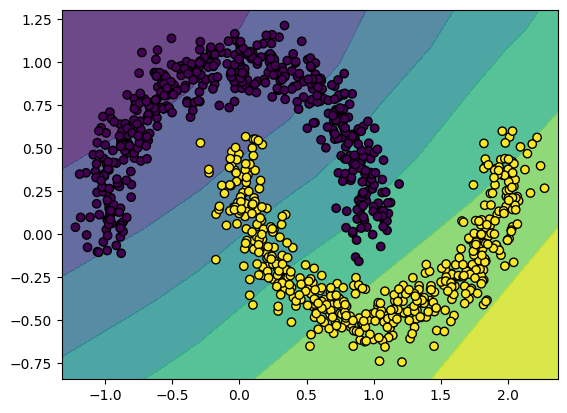

In [24]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        pred_func = model(grid)
    z = pred_func.reshape(xx.shape).numpy()
    plt.contourf(xx, yy, z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X.numpy(), y.numpy())


**Step 6: Replicate Tanh Activation Function**
I’ll replicate the Tanh activation function in pure PyTorch.

In [25]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Test the Tanh function
x = torch.tensor([1.0, -1.0, 0.0])
print(tanh(x))


tensor([ 0.7616, -0.7616,  0.0000])


**Step 7: Create Multi-Class Dataset and Model**
I’ll create a multi-class dataset using the spirals data creation function and construct a model capable of fitting the data.

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
)
Epoch 10/100, Train Loss: 1.1039, Train Acc: 0.3333, Test Loss: 1.1264, Test Acc: 0.3333
Epoch 20/100, Train Loss: 1.0986, Train Acc: 0.3333, Test Loss: 1.1184, Test Acc: 0.3333
Epoch 30/100, Train Loss: 1.0933, Train Acc: 0.3333, Test Loss: 1.1111, Test Acc: 0.3333
Epoch 40/100, Train Loss: 1.0860, Train Acc: 0.3333, Test Loss: 1.1018, Test Acc: 0.3333
Epoch 50/100, Train Loss: 1.0756, Train Acc: 0.4231, Test Loss: 1.0888, Test Acc: 0.4697
Epoch 60/100, Train Loss: 1.0634, Train Acc: 0.4747, Test Loss: 1.0739, Test Acc: 0.4792
Epoch 70/100, Train Loss: 1.0491, Train Acc: 0.6285, Test Loss: 1.0571, Test Acc: 0.5549
Epoch 80/100, Train Loss: 1.0333, Train Acc: 0.6126, Test Loss: 1.0393, Test Acc: 0.5170
Epoch 90/100, Train Loss: 1.0165, Train Acc: 0.6013, Test Loss: 1.

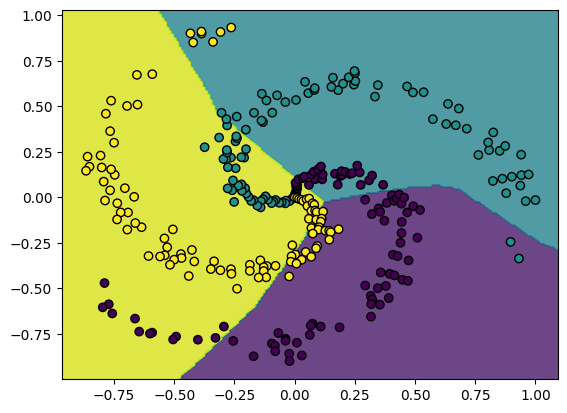

In [26]:
#Step 1: Create and Prepare the Dataset
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def generate_spiral_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y

X, y = generate_spiral_data(100, 3)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Step 2: Build the model below
import torch.nn as nn

class SpiralModel(nn.Module):
    def __init__(self):
        super(SpiralModel, self).__init__()
        self.layer_1 = nn.Linear(2, 16)
        self.layer_2 = nn.Linear(16, 16)
        self.layer_3 = nn.Linear(16, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x

model = SpiralModel()
print(model)

#Step 3: Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Step 4: Create Training and Testing Loop
from torchmetrics.classification import MulticlassAccuracy

# Accuracy function for multi-class classification
accuracy_fn = MulticlassAccuracy(num_classes=3)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_acc = accuracy_fn(y_pred.argmax(dim=1), y_train)

    # Testing loop
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        test_acc = accuracy_fn(y_test_pred.argmax(dim=1), y_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, "
              f"Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}")

#Step 5: Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        pred_func = model(grid)
    z = pred_func.argmax(dim=1).reshape(xx.shape).numpy()
    plt.contourf(xx, yy, z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X.numpy(), y.numpy())

